## Import dependencies

In [1]:
import requests
import stackn.auth as sa
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Prepare data to use as samples for inference requests

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Select a few images from the testset

In [3]:
inp = {"inputs": x_test[0:10].tolist()}

## Define the endpoint to the model you want to infer on

In [4]:
model_url = 'https://tensorflow-serving-mnist-nbx-1ebc.studio.demo.stackn.dev/v1/models/models:predict'

## Run inference towards the endpoint

In [5]:
conf, status = sa.get_token()
res = requests.post(model_url, json=inp, headers={"Authorization": "Bearer "+conf['STACKN_ACCESS_TOKEN']})

In [6]:
results = res.json()

## Show an example of the inferences
picture vs class predicted

Text(0.5, 1.0, 'class label: 7, predicted class: 7(probability: 100.0%)')

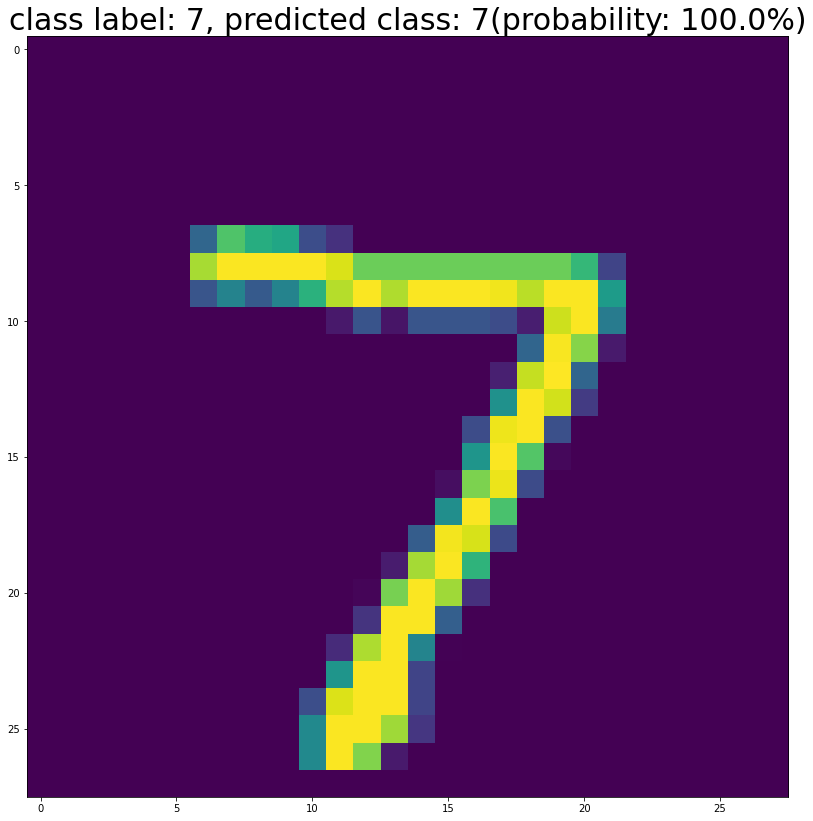

In [7]:
from matplotlib import pylab as plt

#Plot a sample image with class label, predicted class and probability
f, ax = plt.subplots(1,1,figsize=(14,14))
sample =0
ax.imshow(x_test[sample])
sample_prediction = np.argmax(results['outputs'][sample])
ax.set_title("class label: " + str(np.argmax(y_test[sample])) + ", predicted class: " + 
             str(sample_prediction) + "(probability: " + str(np.round(results['outputs'][sample][sample_prediction])*100)+ "%)" ,fontsize=30)